In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### <font color="red"> *Exercise* </font>

Create a widget that computes the square of integers between 0 and 10!

In [6]:
from ipywidgets import interact  # IPython.html.widgets before IPython 4.0
@interact(x=(0, 10))
def square(x):
    return("The square of %d is %d." % (x, x**2))

'The square of 5 is 25.'

### <font color="blue"> Demo: Seaborn </font>

In [7]:
import seaborn as sns

In [8]:
df = pd.read_csv("data/bikes.csv", index_col='Date', parse_dates=True, dayfirst=True) # in case of internet problems
days = np.array(['Monday', 'Tuesday', 'Wednesday', 
                 'Thursday', 'Friday', 'Saturday', 
                 'Sunday'])
df['Weekday'] = days[df.index.weekday]
df_week = df.groupby('Weekday',sort=False).sum()

In [9]:
df_week.index

Index([u'Tuesday', u'Wednesday', u'Thursday', u'Friday', u'Saturday',
       u'Sunday', u'Monday'],
      dtype='object', name=u'Weekday')

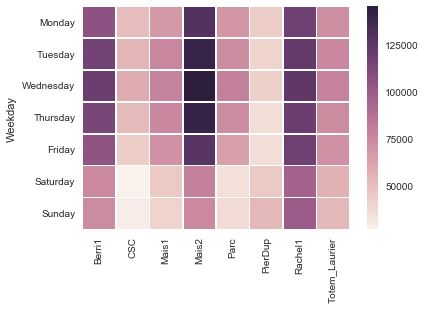

In [10]:
ax = sns.heatmap(df_week.ix[days],linewidths=.5)

### <font color="red"> *Exercise*

- Annotate each cell with the numeric value using integer formatting!

In [7]:
ax = sns.heatmap(df_week.ix[days],linewidths=.5, annot=True, fmt="d")

NameError: name 'df_week' is not defined

### Nobel prizes 

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# dataset from http://oppnadata.se/en/dataset/nobel-prizes/resource/f3da8ba9-a17f-4911-9003-4bcef93619cc
nobel = pd.read_csv("data/nobels.csv")

In [9]:
nobel["number"]=1

### <font color="red"> *Exercise* </font>

- Use the groupby method and `sum()` to extract total numbers of Nobel prizes by country

In [10]:
nobels_by_country = nobel.groupby('country',sort=False).sum()
nobels_by_country

,id,year,share,number
country,,,,
Germany,13313,98614.0,75.0,51
the Netherlands,2660,21416.0,19.0,11
France,15386,78498.0,86.0,40
United Kingdom,32092,178681.0,191.0,91
USA,174455,720168.0,865.0,363
"Alsace (then Germany, now France)",14,1909.0,2.0,1
Sweden,4904,33180.0,31.0,17
Denmark,2634,17571.0,17.0,9
India,37,1930.0,1.0,1


Just look at the numbers

In [11]:
# extract Series from DataFrame:
print(type(nobels_by_country))
nobels_by_country = nobels_by_country["number"]
print(type(nobels_by_country))
#nobels_by_country

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [12]:
nobels_by_country

country
Germany                               51
the Netherlands                       11
France                                40
United Kingdom                        91
USA                                  363
Alsace (then Germany, now France)      1
Sweden                                17
Denmark                                9
India                                  1
Austria                                6
Italy                                  6
Japan                                 18
Ireland                                1
Federal Republic of Germany           26
USSR                                  11
Switzerland                           22
Canada                                 7
Finland                                1
Czechoslovakia                         1
Norway                                 5
Argentina                              2
Belgium                                6
Russia                                 3
Spain                                  1
Hungary 

Hmm, West Germany is listed separately. Let's unify Germany!

In [13]:
nobel = nobel.replace(to_replace="Federal Republic of Germany",value="Germany")
nobels_by_country = nobel.groupby('country',sort=False).sum()
nobels_by_country = nobels_by_country["number"]
nobels_by_country

country
Germany                               77
the Netherlands                       11
France                                40
United Kingdom                        91
USA                                  363
Alsace (then Germany, now France)      1
Sweden                                17
Denmark                                9
India                                  1
Austria                                6
Italy                                  6
Japan                                 18
Ireland                                1
USSR                                  11
Switzerland                           22
Canada                                 7
Finland                                1
Czechoslovakia                         1
Norway                                 5
Argentina                              2
Belgium                                6
Russia                                 3
Spain                                  1
Hungary                                1
Portugal

How many prizes has Finland received?

In [14]:
nobels_by_country?

In [15]:
nobels_by_country["Finland"]

1

Who was it?

In [16]:
nobel.loc?

In [17]:
nobel.loc[nobel['country'] == "Finland"]


,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,...,gender,year,category,overallMotivation,share,motivation,name,city,country,number
212,203,Artturi Ilmari,Virtanen,1895-01-15,1973-11-11,Russian Empire (now Finland),FI,Helsinki,Finland,FI,...,male,1945.0,chemistry,NaN,1.0,"""for his research and inventions in agricultur...",University of Helsinki,Helsinki,Finland,1
